<a href="https://colab.research.google.com/github/Balwant195/CV-Lucas-Kanade-Optical-Flow/blob/main/Computer_Vision_Lucas_Kanade_Optical_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
frame1 = np.asarray(Image.open("/content/drive/MyDrive/Computer Vision/Optical Flow Image1.gif").convert("L"))
frame2 = np.asarray(Image.open("/content/drive/MyDrive/Computer Vision/Optical Flow Image2.gif").convert("L"))

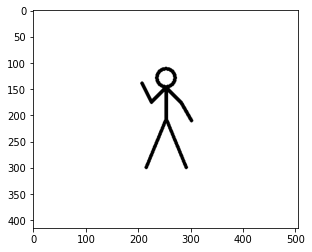

In [ ]:
plt.imshow(frame1,"gray")

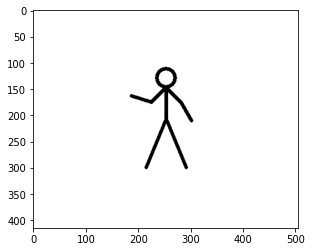

In [ ]:
plt.imshow(frame2, "gray")

In [ ]:
def convolution(image, filter):
    m, n = filter.shape
    a, b = image.shape
    x = a - m + 1
    y = b - n + 1
    con_image = np.zeros((a,b))
    for i in range(x):
      for j in range(y):
        con_image[i][j] = np.sum(image[i:i+m, j:j+n]*filter)

    return con_image

In [ ]:
def Lucas_kanade(frame1, frame2):

  sobelx = np.array([[1,0,-1],
                  [2,0,-2],
                  [1,0,-1]])

  sobely = sobelx.T
  t_filter = np.array([[1, 1],
                     [1, 1]])

  Ix = convolution(frame1, sobelx) + convolution(frame2, sobelx)
  Iy = convolution(frame1, sobely) + convolution(frame2, sobely)
  It = convolution(frame1, t_filter) + convolution(frame2, t_filter)

  u = np.zeros(Ix.shape)
  v = u

  for i in range(1,frame1.shape[0]):
    for j in range(1,frame1.shape[1]):
        Ixx = Ix[i-1:i+2,j-1:j+2].flatten()
        Iyy = Iy[i-1:i+2,j-1:j+2].flatten()
        Itt = It[i-1:i+2,j-1:j+2].flatten()
        A = np.vstack([Ixx,Iyy]).T
        res = np.matmul(np.matmul(np.linalg.pinv(np.matmul(A.T, A)), A.T), Itt)
        u[i,j] = res[0]
        v[i,j] = res[1]

  return u ,v

In [ ]:
u, v = Lucas_kanade(frame1, frame2)

In [ ]:
def drawOnFrame(U, V):
  row, col = U.shape
  u_deci = U[np.ix_(range(0, row, 5), range(0, col, 5))]
  v_deci = v[np.ix_(range(0, row, 5), range(0, col, 5))]
  [X,Y] = np.meshgrid(np.arange(col, dtype = 'float64'), np.arange(row, dtype = 'float64'))
  X_deci = X[np.ix_(range(0, row, 5), range(0, col, 5))]
  Y_deci = Y[np.ix_(range(0, row, 5), range(0, col, 5))]

  return u_deci,v_deci,X_deci,Y_deci

In [ ]:
U1,V1,X1,Y1 = drawOnFrame(u,v)

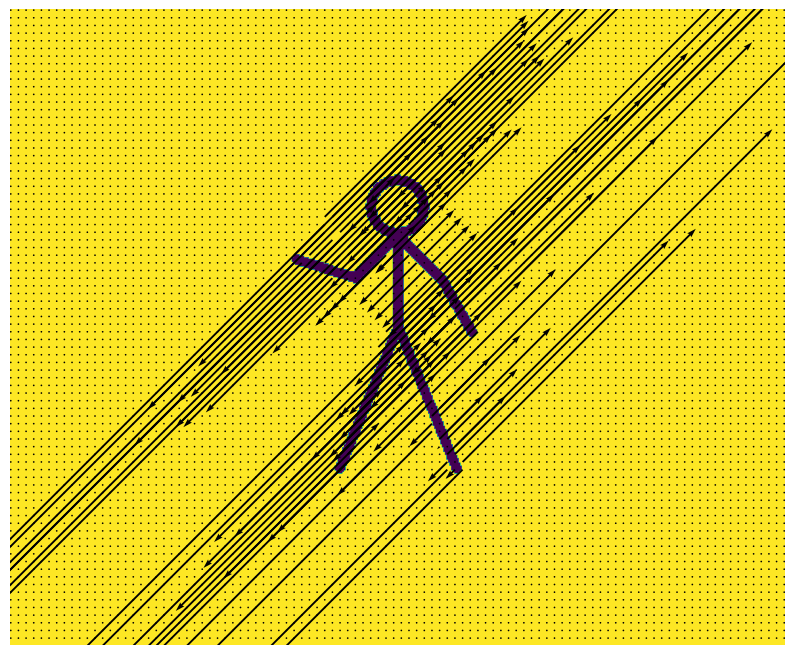

In [ ]:
plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(frame2)
plt.quiver(X1, Y1, U1,V1)
plt.axis('off')
plt.show()